## Лабораторная работа 1. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

### Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучающее (train) и тестовое (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму при оценке модели на тесте. И наоборот, большой размер тестовой выборки ведет к менее шумной оценке качества, однако обученные модели получаются менее точными.

Многие модели классификации предсказывают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). После этого принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения этой лабораторной не требуется.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку.

В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.

Для устранения описанной выше проблемы, **можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест**. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.

**Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH)**. 

Существуют различные **схемы кросс-валидации**:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, предсказывающий победу команды в компьютерной игре Dota2.
 
Более подробно про данные можно почитать на странице первого конкурсного [соревнования](https://www.kaggle.com/t/f2f20fc510f042dfa9751a03c6108805). Целевой признак записан в переменной radiant_win. 

### Обучение классификаторов на вещественных признаках

Загрузите набор данных *train.csv*, *gold.csv* и *lh.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [1]:
import pandas as pd
import numpy as np

In [2]:
lh_data = pd.read_csv("lh.csv", na_values="-1")
gold_data = pd.read_csv("gold.csv", na_values="-1")
train_data = pd.read_csv("train.csv", na_values="-1")

In [4]:
lh_data.head()

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,1,2,1,1,2,3,2,7,1,2
1,0,120,1,5,1,2,6,5,6,14,1,6
2,0,180,2,10,1,7,8,9,9,18,1,9
3,0,240,2,13,1,13,12,9,12,29,1,10
4,0,300,2,15,1,17,19,13,13,36,1,19


In [5]:
gold_data.head()

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,750,350,389,437,428,398,344,654,287,1056
1,0,120,957,1071,633,655,1080,669,1147,1164,438,1360
2,0,180,1161,1527,782,1103,1346,1058,1479,1574,587,2072
3,0,240,1571,2033,932,1515,2058,1760,1767,2387,737,2283
4,0,300,1721,2313,1082,1790,2699,2087,1986,2898,887,3302


In [6]:
train_data.head()

,mid,radiant_won
0,0,1
1,1,0
2,2,1
3,4,1
4,5,1


Иногда в данных встречаются пропуски. Способ обозначения пропусков либо прописывается в описании к данным, либо на месте пропуска после чтения данных оказывается значение [NaN](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "-1". 

**Задание 1** (1 балл) 

Проанализируйте датасет и найдите все признаки, имеющие пропущенные значения (опишите свои наблюдения). 

Предобработайте текущий датасет так, что бы в нём не осталось пропусков (обоснуйте свой выбор метода предобработки).

In [7]:
train_data.isna().sum() / len(train_data)

mid            0.0
radiant_won    0.0
dtype: float64

In [8]:
lh_data.isna().sum() / len(lh_data)

mid         0.0
times       0.0
player_0    0.0
player_1    0.0
player_2    0.0
player_3    0.0
player_4    0.0
player_5    0.0
player_6    0.0
player_7    0.0
player_8    0.0
player_9    0.0
dtype: float64

In [9]:
gold_data.isna().sum() / len(gold_data)

mid         0.0
times       0.0
player_0    0.0
player_1    0.0
player_2    0.0
player_3    0.0
player_4    0.0
player_5    0.0
player_6    0.0
player_7    0.0
player_8    0.0
player_9    0.0
dtype: float64

*Вывод*: в данных отсутствуют пропущенные значения

В начале мы будем работать только с вещественными признаками. 

Возьмите из *gold.csv* и *lh.csv* данные по 600 секунде для каждого матча и подклейте их к *train.csv* (см. [булево индексирование](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) и [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join)).

In [3]:
train_data_gold_lh = train_data.merge(
    gold_data[gold_data["times"] == 600].add_prefix("gold_"), left_on="mid", right_on="gold_mid", how="inner")
train_data_gold_lh = train_data_gold_lh.merge(
    lh_data[lh_data["times"] == 600].add_prefix("lh_"), left_on="mid", right_on="lh_mid", how="inner")
train_data_gold_lh.drop(["gold_mid", "lh_mid", "gold_times", "lh_times"], axis=1, inplace=True)
train_data_gold_lh

,mid,radiant_won,gold_player_0,gold_player_1,gold_player_2,gold_player_3,gold_player_4,gold_player_5,gold_player_6,gold_player_7,...,lh_player_0,lh_player_1,lh_player_2,lh_player_3,lh_player_4,lh_player_5,lh_player_6,lh_player_7,lh_player_8,lh_player_9
0,0,1,3454,5206,2613,4426,5755,4072,3997,5917,...,4,43,3,57,41,34,35,75,2,46
1,1,0,2477,5760,3816,4353,5759,7659,5066,2748,...,5,63,14,28,47,49,23,3,30,39
2,2,1,3604,1948,8581,4390,2869,3096,2301,5130,...,34,6,69,42,23,6,12,56,13,12
3,4,1,3675,4103,5154,3030,2076,3920,3494,3392,...,30,41,45,23,4,26,9,23,37,6
4,5,1,4252,2412,2545,4264,2544,4752,5389,4954,...,42,5,16,30,3,42,24,53,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24969,49939,0,4262,7316,3996,3863,2199,5718,3876,4296,...,49,74,30,12,2,47,5,35,39,4
24970,49940,1,7250,3984,6380,2954,6243,3095,5105,1811,...,48,2,54,12,61,26,71,4,49,5
24971,49941,1,2873,4727,4655,4923,3645,5978,2801,3875,...,31,54,42,52,7,49,1,10,16,53
24972,49945,0,2325,1813,2530,4807,5542,2242,2359,5997,...,13,6,2,37,67,7,7,61,49,2


**Задание 2** (1 балл)

Постройте для команд radiant и dire различные агригаты по игрокам на 600 секунде. Опишите какие именно агригаты вы построили и почему.

Введем следующие агригаты:

  1) Сумма золота всей команды -- чем больше золота, тем больше полезных предметов может купить команда
  
  2) Минимальное и максимальное кол-во золота -- в игре есть четкое дифференцирование по ролям, и одни игроки должны уступать свой "заработок" (добивания крипов, убийства, руны) другим, чтобы те становились сильнее и побеждали в сражениях
  
  3) Минимальное и максимальное кол-во добиваний -- аналогично золоту

In [4]:
train_agregate_data = train_data_gold_lh[["mid", "radiant_won"]].copy()

radiant_players_gold = ["gold_player_" + str(i) for i in range(0, 5)]
radiant_players_lh = ["lh_player_" + str(i) for i in range(0, 5)]
dire_players_gold = ["gold_player_" + str(i) for i in range(5, 10)]
dire_players_lh = ["lh_player_" + str(i) for i in range(5, 10)]

train_agregate_data.loc[:, "radiant_sum_gold"] = train_data_gold_lh[radiant_players_gold].sum(axis=1)
train_agregate_data.loc[:, "radiant_max_gold"] = train_data_gold_lh[radiant_players_gold].max(axis=1)
train_agregate_data.loc[:, "radiant_min_gold"] = train_data_gold_lh[radiant_players_gold].min(axis=1)

train_agregate_data.loc[:, "dire_sum_gold"] = train_data_gold_lh[dire_players_gold].sum(axis=1)
train_agregate_data.loc[:, "dire_max_gold"] = train_data_gold_lh[dire_players_gold].max(axis=1)
train_agregate_data.loc[:, "dire_min_gold"] = train_data_gold_lh[dire_players_gold].min(axis=1)

train_agregate_data.loc[:, "radiant_max_lh"] = train_data_gold_lh[radiant_players_lh].max(axis=1)
train_agregate_data.loc[:, "radiant_min_lh"] = train_data_gold_lh[radiant_players_lh].min(axis=1)

train_agregate_data.loc[:, "dire_max_lh"] = train_data_gold_lh[dire_players_lh].max(axis=1)
train_agregate_data.loc[:, "dire_min_lh"] = train_data_gold_lh[dire_players_lh].min(axis=1)

train_agregate_data.set_index('mid', inplace=True)
train_agregate_data

,radiant_won,radiant_sum_gold,radiant_max_gold,radiant_min_gold,dire_sum_gold,dire_max_gold,dire_min_gold,radiant_max_lh,radiant_min_lh,dire_max_lh,dire_min_lh
mid,,,,,,,,,,,
0,1,21454,5755,2613,22095,6384,1725,57,3,75,2
1,0,22165,5760,2477,24536,7659,2748,63,5,49,3
2,1,21392,8581,1948,15548,5130,2301,69,6,56,6
4,1,18038,5154,2076,17484,4458,2220,45,4,37,6
5,1,16017,4264,2412,22041,5389,2992,42,3,53,12
...,...,...,...,...,...,...,...,...,...,...,...
49939,0,21636,7316,2199,20907,5718,2520,74,2,47,4
49940,1,26811,7250,2954,17305,5105,1811,61,2,71,4
49941,1,20823,4923,2873,22511,5978,2801,54,7,53,1


Сейчас и далее будем рассматривать следующие алгоритмы:
 - [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 - [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
 - [Multi-layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

**Задание 3** (1.5 балла) 

Для каждого алгоритма выберете один гиперпараметр и подберите его оптимальное значение. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

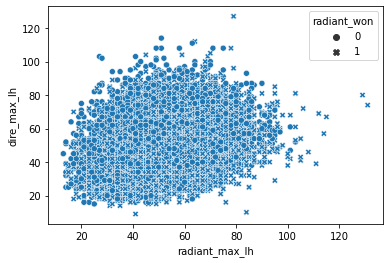

In [38]:
fig = sns.scatterplot(x=train_agregate_data["radiant_max_lh"], y=train_agregate_data["dire_max_lh"], style=target)
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [6]:
target = train_agregate_data.pop('radiant_won')

In [92]:
params = {'C' : [1e-5, 1e-3, 1, 100, 1e4]}
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg_clf = GridSearchCV(log_reg, params, scoring='roc_auc', n_jobs=-1, cv=5)

In [93]:
log_reg_clf.fit(train_agregate_data, target)

KeyboardInterrupt: 

In [14]:
log_reg_clf.cv_results_

{'mean_fit_time': array([0.52785015, 0.66802993, 0.69846549, 0.73215289, 0.64491868]),
 'std_fit_time': array([0.06003379, 0.05709599, 0.09073519, 0.13042019, 0.14860857]),
 'mean_score_time': array([0.02266374, 0.02594337, 0.01840334, 0.02118459, 0.01623402]),
 'std_score_time': array([0.00484587, 0.00847502, 0.00267614, 0.00487028, 0.00592991]),
 'param_C': masked_array(data=[1e-05, 0.001, 1, 100, 10000.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05}, {'C': 0.001}, {'C': 1}, {'C': 100}, {'C': 10000.0}],
 'split0_test_score': array([0.7150896 , 0.71553067, 0.71544364, 0.71543674, 0.71543995]),
 'split1_test_score': array([0.71298491, 0.71348523, 0.71346211, 0.71321981, 0.71321869]),
 'split2_test_score': array([0.7083534 , 0.70840318, 0.70839451, 0.70839114, 0.70839049]),
 'split3_test_score': array([0.70124775, 0.70207322, 0.70210421, 0.70210485, 0.70210453]),
 'split4_test_score': array([0.71033

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
fig = sns.barplot(x=params['C'], y=log_reg_clf.cv_results_['mean_test_score'],
            ci=log_reg_clf.cv_results_['std_test_score'], palette="tab10")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

NameError: name 'params' is not defined

In [23]:
log_reg_clf.best_estimator_.coef_

array([[ 2.05509370e-04,  7.99306697e-05, -5.41328014e-05,
        -1.83426942e-04, -1.09151430e-04, -2.56118710e-05,
         5.27263415e-03, -1.51348086e-02, -5.84126493e-03,
         1.89057712e-02]])

In [96]:
svc_parms = {'C': [0.01, 0.1, 1, 10]}
svc = LinearSVC(max_iter=20000, penalty='l1', dual=False)
svc_clf = GridSearchCV(svc, svc_parms, scoring='roc_auc', n_jobs=-1, cv=5)

In [90]:
svc.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

In [97]:
svc_clf.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=LinearSVC(dual=False, max_iter=20000, penalty='l1'),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10]},
             scoring='roc_auc')

In [98]:
svc_clf.cv_results_

{'mean_fit_time': array([6.07087059, 6.01046114, 6.36909847, 4.90955076]),
 'std_fit_time': array([0.54426366, 0.4963977 , 0.75560275, 0.91600434]),
 'mean_score_time': array([0.01990261, 0.02094917, 0.02391558, 0.01150103]),
 'std_score_time': array([0.00439543, 0.00565233, 0.0055505 , 0.00225234]),
 'param_C': masked_array(data=[0.01, 0.1, 1, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}],
 'split0_test_score': array([0.71542807, 0.71542855, 0.71536577, 0.71536111]),
 'split1_test_score': array([0.71331471, 0.71330732, 0.71328099, 0.71327296]),
 'split2_test_score': array([0.70832081, 0.70829833, 0.70828982, 0.70828741]),
 'split3_test_score': array([0.702022  , 0.70204175, 0.7020122 , 0.70200787]),
 'split4_test_score': array([0.71084056, 0.71085405, 0.71085919, 0.71084907]),
 'mean_test_score': array([0.70998523, 0.709986  , 0.70996159, 0.70995569]),
 'std_test_score

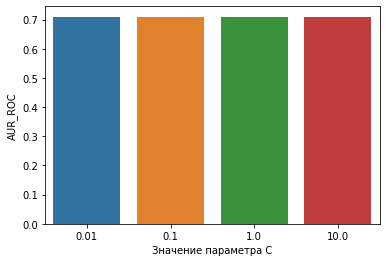

In [99]:
fig_svc = sns.barplot(x=svc_parms['C'], y=svc_clf.cv_results_['mean_test_score'],
            ci=svc_clf.cv_results_['std_test_score'], palette="tab10")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

In [63]:
perceptron = MLPClassifier(activation='logistic')
mplr_clf = GridSearchCV(perceptron, {'hidden_layer_sizes': [35, 32, 30, 28, 25, 23, 20, 19, 17, 15, 13, 10, 8, 5, 2]}, scoring='roc_auc', n_jobs=-1, cv=5)

In [64]:
mplr_clf.fit(train_agregate_data, target)

GridSearchCV(cv=5, estimator=MLPClassifier(activation='logistic'), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [35, 32, 30, 28, 25, 23, 20, 19,
                                                17, 15, 13, 10, 8, 5, 2]},
             scoring='roc_auc')

In [65]:
mplr_clf.cv_results_

{'mean_fit_time': array([12.41019959, 11.12844887, 12.19423776,  9.66268864,  9.52088861,
         7.91034923,  6.65821962, 10.38372822,  7.70667462,  7.43340201,
         8.00454311,  7.67011294,  5.00463896,  4.55549045,  5.68864398]),
 'std_fit_time': array([3.39400907, 4.33066385, 5.05773447, 1.41343173, 2.00780354,
        1.79059978, 2.67510258, 3.13467123, 3.40073283, 0.89303654,
        3.08371249, 3.55667828, 2.15759416, 0.93876337, 2.08893291]),
 'mean_score_time': array([0.06051936, 0.05342679, 0.04440212, 0.0409771 , 0.05528188,
        0.03700652, 0.03590813, 0.04152784, 0.03529725, 0.03309298,
        0.03662229, 0.02626309, 0.03036523, 0.02480736, 0.0186183 ]),
 'std_score_time': array([0.01080361, 0.00934455, 0.00310985, 0.00329426, 0.01510882,
        0.00715412, 0.00329007, 0.01036916, 0.00509911, 0.00372642,
        0.00979403, 0.0033116 , 0.00667561, 0.00642913, 0.00585762]),
 'param_hidden_layer_sizes': masked_array(data=[35, 32, 30, 28, 25, 23, 20, 19, 17, 15, 13,

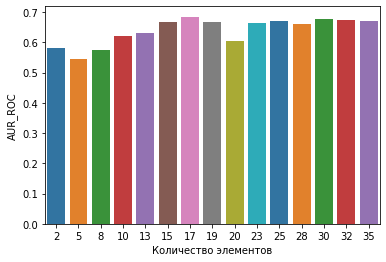

In [68]:
fig_mlp = sns.barplot(x=[35, 32, 30, 28, 25, 23, 20, 19, 17, 15, 13, 10, 8, 5, 2],
                      y=mplr_clf.cv_results_['mean_test_score'],
            ci=mplr_clf.cv_results_['std_test_score'], palette="tab10")
plt.xlabel("Количество элементов")
plt.ylabel("AUR_ROC")
pass

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это могло повлиять на качество, давайте посмотрим на значения самих признаков.

**Задание 4** (1 балл) 

Посмотрите на значения признаков по gold и lh. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

Для анализа возьмем одну колонку какого-нибудь игрока в данных о золоте и добиваниях. Расмотрим стандартные характеристики среднее значение и диспресия (так как у нас много данных, то по одной колонке мы может говорить о харакетере всего датасета).

In [45]:
print(gold_data["player_0"].describe())
print('-' * 20)
print(lh_data["player_0"].describe())

count    499480.000000
mean       2152.879521
std        1431.458854
min         168.000000
25%        1010.000000
50%        1876.000000
75%        3006.000000
max       15046.000000
Name: player_0, dtype: float64
--------------------
count    499480.000000
mean         14.600811
std          14.283622
min           1.000000
25%           3.000000
50%           9.000000
75%          23.000000
max         113.000000
Name: player_0, dtype: float64


Мы видим, что данные очень отличаются и по среднему и по дисперсии.

In [50]:
print(train_agregate_data["radiant_sum_gold"].describe())
print('-' * 20)
print(train_agregate_data["radiant_max_lh"].describe())

count    24974.000000
mean     20089.322535
std       2614.068298
min      11247.000000
25%      18316.250000
50%      19929.000000
75%      21666.000000
max      47074.000000
Name: radiant_sum_gold, dtype: float64
--------------------
count    24974.000000
mean        51.800753
std         13.038086
min         13.000000
25%         42.000000
50%         51.000000
75%         60.000000
max        131.000000
Name: radiant_max_lh, dtype: float64


Еще сильнее данные разнятся на наших агрегатных признаках.

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 

**Задание 5** (1 балл) 

Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество алгоритмов и почему?

In [54]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [59]:
from sklearn.pipeline import Pipeline
log_reg_pipe = Pipeline([('scale', StandardScaler()), 
                        ('log_reg', LogisticRegression(max_iter=100000, solver='liblinear'))])


log_reg_scale_params = {'log_reg__C' : [1e-5, 1e-3, 1, 100, 1e4]}                        

log_reg_clf_scaled = GridSearchCV(log_reg_pipe, log_reg_scale_params, scoring='roc_auc', n_jobs=-1, cv=5)

In [65]:
log_reg_clf_scaled.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('log_reg',
                                        LogisticRegression(max_iter=100000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [1e-05, 0.001, 1, 100, 10000.0]},
             scoring='roc_auc')

In [66]:
log_reg_clf_scaled.cv_results_

{'mean_fit_time': array([0.10993333, 0.22605858, 0.2654644 , 0.31860104, 0.26731558]),
 'std_fit_time': array([0.01128167, 0.055073  , 0.01322244, 0.03481063, 0.050962  ]),
 'mean_score_time': array([0.0225646 , 0.01864982, 0.02696052, 0.02366061, 0.0168736 ]),
 'std_score_time': array([0.00625466, 0.00399888, 0.0083403 , 0.00810263, 0.00339915]),
 'param_log_reg__C': masked_array(data=[1e-05, 0.001, 1, 100, 10000.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'log_reg__C': 1e-05},
  {'log_reg__C': 0.001},
  {'log_reg__C': 1},
  {'log_reg__C': 100},
  {'log_reg__C': 10000.0}],
 'split0_test_score': array([0.70788118, 0.71326124, 0.71538728, 0.71538664, 0.71538648]),
 'split1_test_score': array([0.70952617, 0.71216137, 0.71319477, 0.71319525, 0.71319605]),
 'split2_test_score': array([0.70224984, 0.70605539, 0.7083534 , 0.70835758, 0.70835822]),
 'split3_test_score': array([0.69694348, 0.70130893, 0.70207948, 

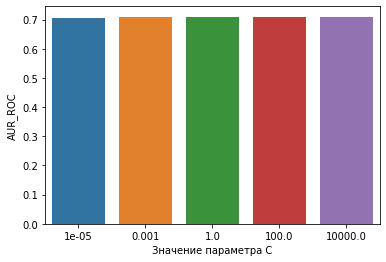

In [67]:
fig = sns.barplot(x=[1e-5, 1e-3, 1, 100, 1e4], y=log_reg_clf_scaled.cv_results_['mean_test_score'],
            ci=log_reg_clf_scaled.cv_results_['std_test_score'], palette="tab10")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

In [122]:
svc_pipe = Pipeline([('scale', StandardScaler()), 
                        ('svc', LinearSVC(max_iter=20000))])

svc_scale_parms = {'svc__C': [0.00001, 0.0001, 0.001, 0.1, 1, 10]}

svc_scale_clf = GridSearchCV(svc_pipe, svc_scale_parms, scoring='roc_auc', n_jobs=-1, cv=5)

In [123]:
svc_scale_clf.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svc', LinearSVC(max_iter=20000))]),
             n_jobs=-1,
             param_grid={'svc__C': [1e-05, 0.0001, 0.001, 0.1, 1, 10]},
             scoring='roc_auc')

In [126]:
svc_scale_clf.cv_results_

{'mean_fit_time': array([1.96320200e-01, 1.92917728e-01, 1.70446539e-01, 3.68290539e+00,
        3.97802395e+01, 1.96038474e+02]),
 'std_fit_time': array([0.01425283, 0.03019225, 0.0199163 , 0.67505894, 6.55334712,
        9.35306123]),
 'mean_score_time': array([0.02936687, 0.01755753, 0.02084031, 0.0295414 , 0.02159786,
        0.01181979]),
 'std_score_time': array([0.0139719 , 0.0026045 , 0.0025367 , 0.01102576, 0.005186  ,
        0.00196418]),
 'param_svc__C': masked_array(data=[1e-05, 0.0001, 0.001, 0.1, 1, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'svc__C': 1e-05},
  {'svc__C': 0.0001},
  {'svc__C': 0.001},
  {'svc__C': 0.1},
  {'svc__C': 1},
  {'svc__C': 10}],
 'split0_test_score': array([0.70920873, 0.71304094, 0.71510694, 0.71536015, 0.71535951,
        0.71535774]),
 'split1_test_score': array([0.71030427, 0.71209794, 0.713228  , 0.71327537, 0.71327344,
        0.71327119]),
 'split2_

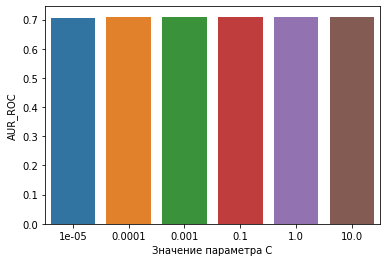

In [125]:
fig = sns.barplot(x=[0.00001, 0.0001, 0.001, 0.1, 1, 10], y=svc_scale_clf.cv_results_['mean_test_score'],
            ci=svc_scale_clf.cv_results_['std_test_score'], palette="tab10")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

**Задание 6** (1.5 балла) 

Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма. Какие гиперпараметры вы настраивали? Удалось ли улучшить качество алгоритмов?

### Добавление категориальных признаков в модели

**Задание 7** (1 балл) 

Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Для каких целей можно использовать знание качества на обучающей части выборки?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

После выполнения данного блока вы получите решение, которое можно отправить в соревнование на [kaggle](https://www.kaggle.com/t/f2f20fc510f042dfa9751a03c6108805). 

Будьте внимательными, для части матчей из test.csv отсутствуют некоторые данные, для этих матчей все равно требуется что-то предсказать.

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**Задание 8** (1 балл) 

Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn). Это задание предлагается делать с использованием *heroes.csv*. Представьте каждую из команд в виде one-hot-encoded вектора с пятью единицами и остальными нулями.

После кодирования признаков получилось достаточно много и правильно будет заново подобрать оптимальные гиперпараметры для моделей. 

**Задание 9** (1 балл)

Добавьте к масштабированным вещественным признакам закодированные категориальные и подберите гиперпараметры заново. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

One-hot encoding значительно увеличил количество входных данных. 

Как изменилось количество параметров у моделей? Наблюдается ли переобучение?

### Смешивание моделей (blending)

Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**Задание 10** (2 балла)

При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

**Задание 11** (1 балл)

Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

### Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей, правильным продолжением является сравнение их между собой.  Воспользуйтесь диаграммой размаха ("ящик с усами") для сравнения алгоритмов между собой. Эту диаграмму можно построить при помощи [boxplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) из matplotlib либо через [обертку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) над ней из pandas.

**Задание 12** (2 балла) 

Для каждого типа классификатора, а так же смешанной модели, выберите тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

Не забудьте продолжить участвовать в соревнование, воспользовавшись всеми полученными наработками.